## Import relevant libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Rely on the Sklearn for clustering
from sklearn.cluster import KMeans

## Load the data

In [56]:
data = pd.read_csv('2.1 3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Select features

### DataFrame.iloc[row, column] slices the data frame, with the rows and columns to be kept
select all rows, put the colon (:) at first argument

In [57]:
x = data.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,English
1,62.40,-96.80,English
2,46.75,2.40,French
3,54.01,-2.53,English
4,51.15,10.40,German
5,-25.45,133.11,English


# Clustering Categorical Data

## Map the data

In [58]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [59]:
language_to_cluster = data_mapped.iloc[:, 1:4]
language_to_cluster

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [60]:
kmeans = KMeans(2)
kmeans

KMeans(n_clusters=2)

In [61]:
x=language_to_cluster
kmeans.fit(x)

KMeans(n_clusters=2)

In [62]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = kmeans.fit_predict(language_to_cluster)
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


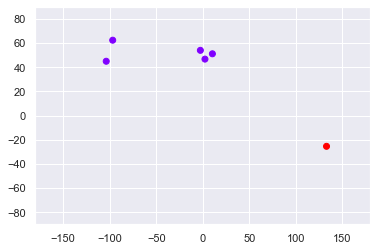

In [63]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow')
# Longtitude of the globe limit [-180,180]
plt.xlim(-180,180)

# Latitude of the globe limit [-90,90]
plt.ylim(-90,90)

plt.show()

## Selecting the number of clusters (The Elbow Method)

### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

In [64]:
kmeans.inertia_

13208.958119999996

We need to solve the problem with 1 2 3 ... and so on clusters and calculate WCSS for each. So let's apply a for..loop

In [65]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
#First way to init DataFrame

# Number_of_cluster = [1,2,3,4,5,6,7]
# list_of_tuple = list(zip(wcss, Number_of_cluster))
# df = pd.DataFrame(list_of_tuple, columns=['WCSS','No. of Cluster'])
# df

#Second way to init DataFrame
df_wcss_cluster = pd.DataFrame()
df_wcss_cluster['WCSS'] = wcss
df_wcss_cluster['No. of Cluster'] = list(range(1,7))
df_wcss_cluster

,WCSS,No. of Cluster
0,42605.413567,1
1,13208.958120,2
2,290.105233,3
3,113.912333,4
4,39.006250,5
5,0.000000,6


#### Let's plot the above Table to see our result!!

Text(0, 0.5, 'Within-cluster Sum of Square')

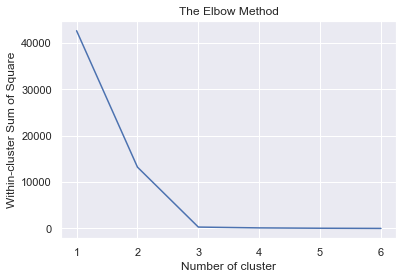

In [67]:
number_cluster = range(1,7)
plt.plot(number_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Within-cluster Sum of Square')

In [68]:
kmeans.init

'k-means++'